#### Biopython

[Biopython](https://biopython.org/) is a module for doing bioinformatics
in Python. It has a nice [tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html).


In [2]:
ls fox*

foxl2.fasta


In [3]:
# the foxl2 gene
# https://raw.githubusercontent.com/pvanheus/bitc2019_notebooks/master/foxl2.fasta


In [5]:
from Bio import SeqIO

sequence_record = SeqIO.read('foxl2.fasta', 'fasta')
print(sequence_record)

ID: NG_012454.1:5004-7917
Name: NG_012454.1:5004-7917
Description: NG_012454.1:5004-7917 Homo sapiens forkhead box L2 (FOXL2), RefSeqGene on chromosome 3
Number of features: 0
Seq('AGAACAGAGCGAGGCTCCTGGCGCACTAGGGACTCCAGGAGGCAGCTCCGCCAG...TAA', SingleLetterAlphabet())


In [8]:
my_sequence = str(sequence_record.seq)
print(my_sequence[:100])

AGAACAGAGCGAGGCTCCTGGCGCACTAGGGACTCCAGGAGGCAGCTCCGCCAGAGACGCGGGTCGTGCTTCGGGAAACCGGGGGGCGGGGGGAGGGGAA


In [9]:
print(len(my_sequence))

2914


In [14]:
def gene_to_kmers(dna, k):
    kmers = []
    for start in range(len(dna) - k):
        kmer = dna[start:start + k]
        kmers.append(kmer)
    return kmers

In [15]:
kmers = gene_to_kmers(my_sequence, 5)

['CTTCT', 'TTCTT', 'TCTTT', 'CTTTT', 'TTTTA']

In [16]:
def kmer_counts(kmers):
    kmer_count_dict = {}
    for kmer in kmers:
        if kmer in kmer_count_dict:
            kmer_count_dict[kmer] += 1
        else:
            kmer_count_dict[kmer] = 1
    return kmer_count_dict

In [20]:
# get a dictionary of kmer counts
kmer_count_dict = kmer_counts(kmers)

In [28]:
def counts_to_tuples(kmer_count_dict):
    tuples = []
    for kmer, count in kmer_count_dict.items():
        tuples.append([kmer, count])
    return tuples

In [29]:
from operator import itemgetter

In [34]:
sorted_counts = sorted(counts_to_tuples(kmer_count_dict),
                       key=itemgetter(1), reverse=True)
sorted_counts[:10]

[['GCCGC', 31],
 ['CCGCC', 24],
 ['CGCCG', 24],
 ['GGCGG', 23],
 ['CCGGC', 20],
 ['GCGGG', 18],
 ['AAAAA', 18],
 ['CCCGG', 17],
 ['GCGGC', 16],
 ['GGCCG', 16]]

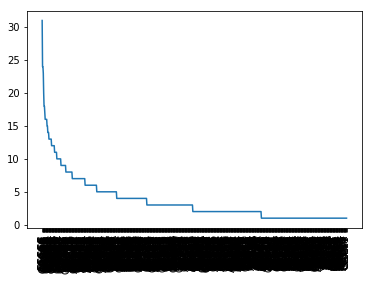

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [ el[0] for el in sorted_counts ]
y = [ el[1] for el in sorted_counts ]
plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()